# Train / Test

We'll start by creating some data set that we want to build a model for (in this case a polynomial regression):

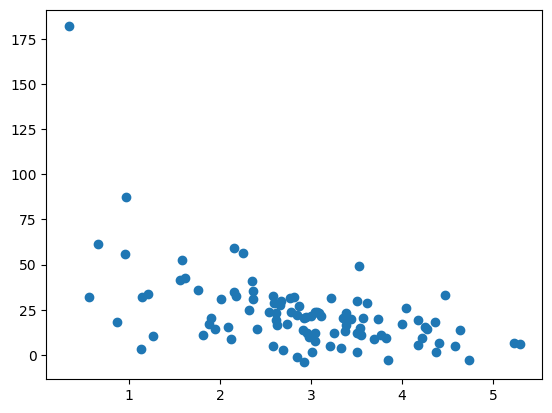

In [1]:
%matplotlib inline
import numpy as np
from pylab import *

np.random.seed(2)  #define a semente do gerador de numeros aleatorios para garantir resultados manpulaveis

pageSpeeds = np.random.normal(3.0, 1.0, 100)  # Cria um array de 100 números aleatorio com distribuicao normal (media 3, desvio padrao 1) 
purchaseAmount = np.random.normal(50.0, 30.0, 100) / pageSpeeds  #cria uma relacao inversa entre a velocidade da pagina e os valores de compras

scatter(pageSpeeds, purchaseAmount)  # plota um grafico entre os dois


Now we'll split the data in two - 80% of it will be used for "training" our model, and the other 20% for testing it. This way we can avoid overfitting.

In [2]:
trainX = pageSpeeds[:80]#separa os 80 primeiros valores para treino
testX = pageSpeeds[80:]#separa os 80 restantes valores para teste

trainY = purchaseAmount[:80]#separa os 80 primeiros valores para o conjunto de treinamento
testY = purchaseAmount[80:]#separa os 80 restantes valores para o conjunto de teste


Here's our training dataset:

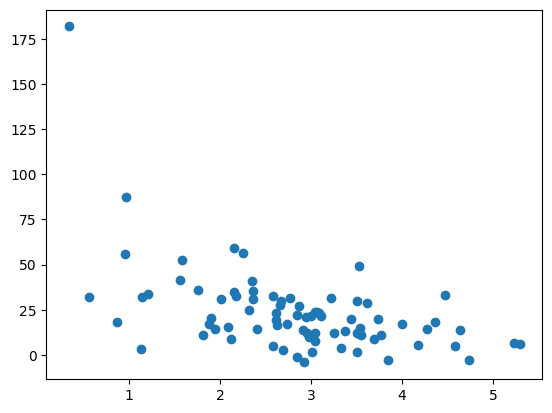

In [3]:
scatter(trainX, trainY)#grafico de dispersao usando os dados de treinamento

And our test dataset:

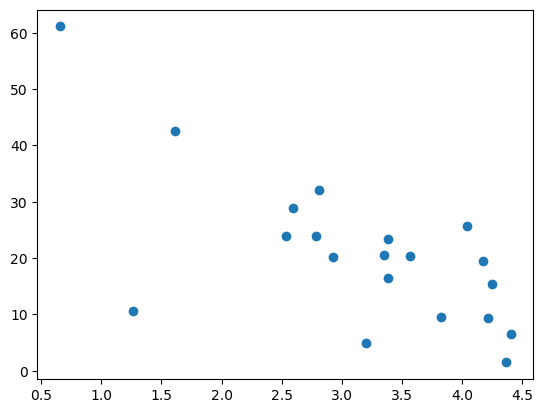

In [4]:
scatter(testX, testY)#grafico de dispersao usando os dados de teste

Now we'll try to fit an 8th-degree polynomial to this data (which is almost certainly overfitting, given what we know about how it was generated!)

In [5]:
x = np.array(trainX)
y = np.array(trainY)

p4 = np.poly1d(np.polyfit(x, y, 8)) #plota os dois em um grafico de polinomio 8

Let's plot our polynomial against the training data:

In [ ]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)  #cria 100 pontos igualmente espaçados no intervalo de 0 a 7 
axes = plt.axes()  #configura os eixos do graficos
axes.set_xlim([0, 7])  #define o limite do eixo X de 0 a 7
axes.set_ylim([0, 200])  # Define o limite do eixo Y de 0 a 200
plt.scatter(x, y)  #plota os pontos de dados de treinamento como um grafico de dispersao
plt.plot(xp, p4(xp), c='r')  #plota a curva ajustada do polinomio sobre os dados usando a cor vermelha
plt.show()  # Exibe o grafico gerado


And against our test data:

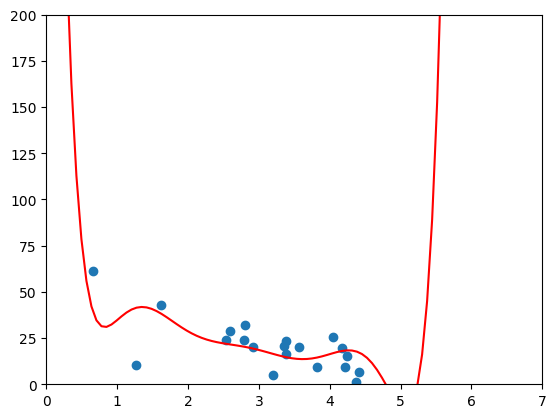

In [7]:
testx = np.array(testX)  # transforma os dados de teste de velocidades de pagina para um array 
testy = np.array(testY)  #transforma os dados de teste de valores de compra para um array 

axes = plt.axes()  #configura os eixos do graficos
axes.set_xlim([0, 7])  #define o limite do eixo X de 0 a 7
axes.set_ylim([0, 200])  #define o limite do eixo Y de 0 a 200
plt.scatter(testx, testy)  #plota os pontos de teste como um grafico de dispersao
plt.plot(xp, p4(xp), c='r')  #plota a curva ajustada do polinomio sobre os dados de teste usando a cor vermelha
plt.show()  

#causa um overffiting, por conta que tentamos ajustar demais

Doesn't look that bad when you just eyeball it, but the r-squared score on the test data is kind of horrible! This tells us that our model isn't all that great...

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(testy, p4(testx))#calcula o valor de Rˆ2 comparando com os valores reais e os valores previstos

print(r2)

#valor do R baixissimo por conta o do overffiting anterior


...even though it fits the training data better:

In [9]:
from sklearn.metrics import r2_score

r2 = r2_score(np.array(trainY), p4(np.array(trainX)))# Calcula o Rˆ2 para os dados de treinamento comparando os valores reais com os previstos 

print(r2)

0.6427069514691365


If you're working with a Pandas DataFrame (using tabular, labeled data,) scikit-learn has built-in train_test_split functions to make this easy to do.

Later we'll talk about even more robust forms of train/test, like K-fold cross-validation - where we try out multiple different splits of the data, to make sure we didn't just get lucky with where we split it.

## Activity

Try measuring the error on the test data using different degree polynomial fits. What degree works best?

In [11]:
from sklearn.metrics import r2_score  

#funcao para testar diferentes graus de polinomios
for degree in range(1, 11):  #testa polinomios de grau 1 a 10
    model = np.poly1d(np.polyfit(trainX, trainY, degree))  # Cria o modelo polinomial com o grau atual
    r2_test = r2_score(testY, model(testX))  # Calcula o R² para o conjunto de teste
    r2_train = r2_score(trainY, model(trainX))  # Calcula o R² para o conjunto de treinamento
    print(f"Grau {degree}: Rˆ2 Treinamento = {r2_train:.4f}, Rˆ2 Teste = {r2_test:.4f}")  # Exibe os resultados


Grau 1: Rˆ2 Treinamento = 0.2647, Rˆ2 Teste = 0.4225
Grau 2: Rˆ2 Treinamento = 0.3616, Rˆ2 Teste = 0.2935
Grau 3: Rˆ2 Treinamento = 0.4296, Rˆ2 Teste = 0.2727
Grau 4: Rˆ2 Treinamento = 0.4831, Rˆ2 Teste = 0.3936
Grau 5: Rˆ2 Treinamento = 0.5545, Rˆ2 Teste = 0.5041
Grau 6: Rˆ2 Treinamento = 0.6025, Rˆ2 Teste = 0.6050
Grau 7: Rˆ2 Treinamento = 0.6170, Rˆ2 Teste = 0.5461
Grau 8: Rˆ2 Treinamento = 0.6427, Rˆ2 Teste = 0.3002
Grau 9: Rˆ2 Treinamento = 0.6634, Rˆ2 Teste = 0.2162
Grau 10: Rˆ2 Treinamento = 0.6819, Rˆ2 Teste = 0.2249
